### @author: vinay

### Aim: Finding rainfall and temperature correlation

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [48]:
rain_df = pd.read_csv(r'D:\Postgraduation\OneDrive - students.iitmandi.ac.in\Postgraduation\Semester III\MA605\Data\climate\NWH-CRU_pre_1901-2020_month_50km_cleaned.csv', header=None)
temperature_df = pd.read_csv(r'D:\Postgraduation\OneDrive - students.iitmandi.ac.in\Postgraduation\Semester III\MA605\Data\climate\NWH-CRU_tmp_1901-2020_month_50km_cleaned.csv', header=None)

In [61]:
correlation_rain_temp_df = pd.DataFrame(columns = ['Longitude', 'Latitude', 'Correlation'])
for ind in rain_df.index:
    if ind == 0:
        continue
    corr, _ = pearsonr(rain_df.iloc[ind, 3:], temperature_df.iloc[ind, 3:])
    correlation_rain_temp_df = correlation_rain_temp_df.append({'Longitude': float(rain_df[1][ind]), 'Latitude': float(rain_df[2][ind]), 'Correlation': corr}, ignore_index=True)

In [62]:
correlation_rain_temp_df = correlation_rain_temp_df.sort_values(by=['Longitude', 'Latitude'])

In [ ]:
minVal =  np.min(correlation_rain_temp_df['Correlation'])
maxVal =  np.max(correlation_rain_temp_df['Correlation'])

In [68]:
minVal, maxVal

(-0.54716417898531, 0.5817230345341491)

Text(0.5, 1.0, 'Correlation of rainfall and temperature over NWH')

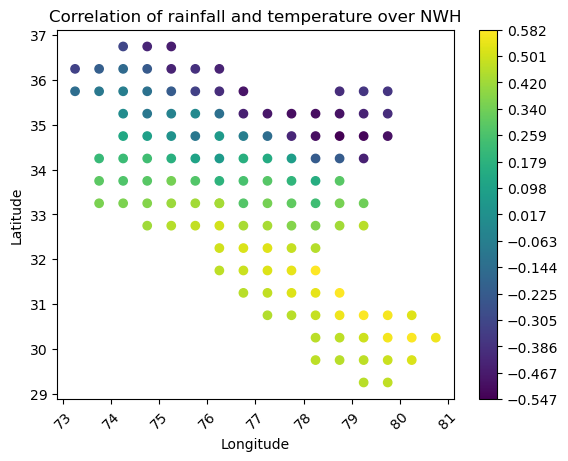

In [73]:
colors = correlation_rain_temp_df['Correlation'].astype(float)
#int_array  = colors.astype(int)
image = plt.scatter(correlation_rain_temp_df['Longitude'], correlation_rain_temp_df['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Correlation of rainfall and temperature over NWH")